In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
input_data = pd.read_csv('~/Downloads/train.csv')

test_data_raw = pd.read_csv('~/Downloads/test.csv')

Y = np.array(input_data[['Survived']])

# Only pick a few columns
input_data = input_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
test_data = test_data_raw[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

Y.shape

(890, 1)

In [3]:
input_data = input_data.fillna(input_data.mode().iloc[0])

test_data = test_data.fillna(test_data.mode().iloc[0])

In [4]:
input_data['Sex'] = input_data['Sex'].map( {'female' : 1, 'male' : 0} ).astype(int)
test_data['Sex'] = test_data['Sex'].map( {'female' : 1, 'male' : 0} ).astype(int)

In [5]:
input_data['Embarked'] = input_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

test_data['Embarked'] = test_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [6]:
for column in input_data:
    max_recip = 1 / input_data[column].max()
    input_data[column] *= max_recip

for column in test_data:
    max_recip = 1 / test_data[column].max()
    test_data[column] *= max_recip
input_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.333333,1.0,0.4750,0.125,0.0,0.139136,0.5
1,1.000000,1.0,0.3250,0.000,0.0,0.015469,0.0
2,0.333333,1.0,0.4375,0.125,0.0,0.103644,0.0
3,1.000000,0.0,0.4375,0.000,0.0,0.015713,0.0
4,1.000000,0.0,0.3000,0.000,0.0,0.016510,1.0


In [7]:
X = np.array(input_data)
test = np.array(test_data)
print(test.shape)

(418, 7)


In [8]:
random.seed(1)

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_slope(y):
    return y * (1-y)

In [10]:
alpha = .1
hiddenSize_0 = 20
input_width = 7
iterations = 10000
dropout_rate = .05

In [11]:
syn0 = 2*np.random.random((input_width, hiddenSize_0)) - 1
syn1 = 2*np.random.random((hiddenSize_0, 1)) - 1

Final error: 0.226849549371


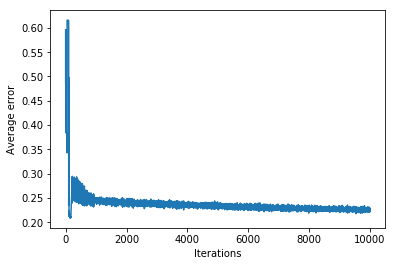

In [12]:
error_plt = ([],[])

for i in range(iterations):
    l0 = X

    # Forward Propogation
    l1 = sigmoid(np.dot(l0, syn0))
    if dropout_rate != 0: # Dropout
        l1 *= np.random.binomial([np.ones((len(X),hiddenSize_0))],1-dropout_rate)[0] * (1.0/(1-dropout_rate))
    l2 = sigmoid(np.dot(l1, syn1))

    # Backpropogation
    l2_error = l2 - Y #l3_delta.dot(syn2.T)
    l2_delta = l2_error * sigmoid_slope(l2)

    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * sigmoid_slope(l1)

    syn1 -= l1.T.dot(l2_delta) * alpha
    syn0 -= l0.T.dot(l1_delta) * alpha
    
    # Printout Stuff
    #if (i % (iterations / 100)) == 0:
    error_plt[0].append(i)
    error_plt[1].append(np.mean(np.abs(l2_error)))
print("Final error: " + str(np.mean(np.abs(l2_error))))
plt.plot(error_plt[0], error_plt[1])
plt.ylabel("Average error")
plt.xlabel("Iterations")
plt.show()

In [13]:
error = l2 - Y
total_error = np.sum(abs(error))

int_error = np.rint(l2) - Y
error_count = np.count_nonzero(int_error)

print("Total error: " + str(total_error))
print("Error Count: " + str(error_count) + " of 418")

Total error: 201.89609894
Error Count: 139 of 418


In [14]:
pred_l1 = sigmoid(np.dot(test, syn0))
pred_l2 = sigmoid(np.dot(pred_l1, syn1))

prediction = np.rint(pred_l2)

print("Prediction: %d survivors out of 418" % np.count_nonzero(prediction))

Prediction: 134 survivors out of 418


In [15]:
test_data_raw['Survived'] = prediction.astype(int)

submission = test_data_raw[['PassengerId', 'Survived']]
submission.to_csv('titanic.csv', index=False)
submission.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.320574
std,120.810458,0.467257
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000
